# Generating Metafile

In [12]:
import os
import csv

In [13]:
directory = "/home/arunb/Abhijeet_2021509/data"
metafile_path = "/home/arunb/Abhijeet_2021509/scam-legit/openSMILE/metafile.csv"

In [14]:
folder_to_label = {
    "robot+legit": "legit",
    "robot+scam": "scam"
}

In [15]:
file_data = []

for folder, label in folder_to_label.items():
    folder_path = os.path.join(directory, folder)
    if os.path.exists(folder_path):
        for root, _, files in os.walk(folder_path):
            for file in files:
                file_path = os.path.join(root, file)
                file_data.append([file_path, label])


In [16]:
with open(metafile_path, mode='w', newline='', encoding='utf-8') as metafile:
    writer = csv.writer(metafile)
    writer.writerow(["file_location", "label"])
    writer.writerows(file_data)

print(f"Metafile generated at: {metafile_path}")

Metafile generated at: /home/arunb/Abhijeet_2021509/scam-legit/openSMILE/metafile.csv


# 6373 Features

## Feature Extraction

In [ ]:
import pandas as pd
import opensmile
from multiprocessing import Pool, cpu_count
from tqdm import tqdm

In [ ]:
smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.ComParE_2016,  # Choose feature set (e.g., ComParE_2016)
    feature_level=opensmile.FeatureLevel.Functionals,  # Choose feature level
)
len (smile.feature_names)

6373

In [ ]:
def process_audio(row):
    audio_file = row['file_location']
    label = row['label']
    features = smile.process_file(audio_file)
    features['label'] = 1 if label == "scam" else 0
    return features

In [ ]:
metafile_path = "/home/arunb/Abhijeet_2021509/scam-legit/openSMILE/metafile.csv"
features_file = "/home/arunb/Abhijeet_2021509/scam-legit/openSMILE/features6373.csv"

metadata = pd.read_csv(metafile_path)

In [ ]:
with Pool(cpu_count()) as pool:
    results = list(tqdm(pool.imap(process_audio, [row for _, row in metadata.iterrows()]), 
                        total=len(metadata), desc="Extracting Features"))

all_features = pd.concat(results, ignore_index=True)

# Save combined features to a CSV file
all_features.to_csv(features_file, index=False)
print(f"Combined features saved to: {features_file}")

Extracting Features: 100%|██████████| 15295/15295 [04:02<00:00, 62.98it/s] 


Combined features saved to: /home/arunb/Abhijeet_2021509/scam-legit/openSMILE/features.csv


## Classification

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils import shuffle

In [15]:
# Load the saved features
features_file = "/home/arunb/Abhijeet_2021509/scam-legit/openSMILE/features/features6373.csv"
data = pd.read_csv(features_file)
data.shape

(15295, 6374)

In [16]:
data.head()

,audspec_lengthL1norm_sma_range,audspec_lengthL1norm_sma_maxPos,audspec_lengthL1norm_sma_minPos,audspec_lengthL1norm_sma_quartile1,audspec_lengthL1norm_sma_quartile2,audspec_lengthL1norm_sma_quartile3,audspec_lengthL1norm_sma_iqr1-2,audspec_lengthL1norm_sma_iqr2-3,audspec_lengthL1norm_sma_iqr1-3,audspec_lengthL1norm_sma_percentile1.0,...,mfcc_sma_de[14]_peakRangeRel,mfcc_sma_de[14]_peakMeanAbs,mfcc_sma_de[14]_peakMeanMeanDist,mfcc_sma_de[14]_peakMeanRel,mfcc_sma_de[14]_minRangeRel,mfcc_sma_de[14]_meanRisingSlope,mfcc_sma_de[14]_stddevRisingSlope,mfcc_sma_de[14]_meanFallingSlope,mfcc_sma_de[14]_stddevFallingSlope,label
0,0.967040,0.643258,0.193419,0.077364,0.184146,0.322541,0.106782,0.138395,0.245177,0.032681,...,0.619989,2.457226,2.450311,19.982570,0.485653,107.709440,58.105824,106.251520,57.556515,0
1,2.683351,0.411718,0.361557,0.102118,0.194396,0.652675,0.092278,0.458279,0.550557,0.033905,...,0.567766,2.183562,2.187073,-19.998508,0.478181,101.914505,53.647060,96.535800,49.900036,0
2,0.081176,0.192215,0.306581,0.035712,0.036685,0.045431,0.000974,0.008746,0.009719,0.032297,...,0.453056,2.156527,2.152701,19.997580,0.592156,104.620220,50.220245,98.713000,48.190340,0
3,2.693822,0.158507,0.480337,0.049791,0.076062,0.136557,0.026271,0.060495,0.086766,0.024643,...,0.545722,2.339586,2.340644,-20.000000,0.521803,98.161290,51.646343,95.451675,47.919724,0
4,0.989084,0.437801,0.674157,0.035633,0.037178,0.070124,0.001545,0.032946,0.034491,0.030671,...,0.591355,2.374478,2.381321,-19.980919,0.504615,104.868645,49.974420,106.596340,54.489280,0


In [ ]:
data = shuffle(data, random_state=42)
X = data.drop(columns=["label"])
y = data["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Support Vector Machine (SVM)": SVC(random_state=42),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

In [24]:
# Loop through each classifier, train, and evaluate
for name, model in classifiers.items():
    print(f"\nTraining and evaluating {name}...")

    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    print("\nClassification Report:\n")
    print(classification_report(y_test, y_pred))


Training and evaluating Random Forest...
Accuracy: 1.0

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2774
           1       1.00      1.00      1.00       285

    accuracy                           1.00      3059
   macro avg       1.00      1.00      1.00      3059
weighted avg       1.00      1.00      1.00      3059


Training and evaluating Logistic Regression...
Accuracy: 0.9993461915658712

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2774
           1       0.99      1.00      1.00       285

    accuracy                           1.00      3059
   macro avg       1.00      1.00      1.00      3059
weighted avg       1.00      1.00      1.00      3059


Training and evaluating Support Vector Machine (SVM)...
Accuracy: 0.9980385746976136

Classification Report:

              precision    recall  f1-score   suppor

# 88 Features

In [7]:
import pandas as pd
import opensmile
from multiprocessing import Pool, cpu_count
from tqdm import tqdm

# Initialize the openSMILE instance
smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.eGeMAPSv02,
    feature_level=opensmile.FeatureLevel.LowLevelDescriptors,
)

def process_audio(row):
    """
    Process a single audio file to extract features.
    """
    audio_file = row['file_location']
    label = row['label']
    features = smile.process_file(audio_file)
    features['label'] = 1 if label == "scam" else 0  # Set the label (1 for scam, 0 for legit)
    return features

# Path to the metadata file and output feature file
metafile_path = "/home/arunb/Abhijeet_2021509/scam-legit/openSMILE/metafile.csv"
features_file = "/home/arunb/Abhijeet_2021509/scam-legit/openSMILE/features_full.csv"

# Load the metadata file that contains the file locations
metadata = pd.read_csv(metafile_path)

# Use multiprocessing to extract features in parallel
with Pool(cpu_count()) as pool:
    results = list(tqdm(pool.imap(process_audio, [row for _, row in metadata.iterrows()]), 
                        total=len(metadata), desc="Extracting Features"))

# Combine all extracted features into a single DataFrame
all_features = pd.concat(results, ignore_index=True)

# Save the combined features to a CSV file
all_features.to_csv(features_file, index=False)
print(f"Combined features for all audio files saved to: {features_file}")


Extracting Features: 100%|██████████| 2811/2811 [00:23<00:00, 121.80it/s]


Combined features for all audio files saved to: /home/arunb/Abhijeet_2021509/scam-legit/openSMILE/features_full.csv


## Feature Extraction

In [1]:
import pandas as pd
import opensmile
from multiprocessing import Pool, cpu_count
from tqdm import tqdm

In [2]:
smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.eGeMAPSv02,
    feature_level=opensmile.FeatureLevel.Functionals,
)
len (smile.feature_names)

88

In [3]:
def process_audio(args):
    row, duration = args
    audio_file = row['file_location']
    label = row['label']
    # Extract features only for the first `duration` seconds
    features = smile.process_file(audio_file, start=0, end=duration)
    # Add the label column to the extracted features
    features['label'] = 1 if label == "scam" else 0
    return features

In [4]:
metafile_path = "/home/arunb/Abhijeet_2021509/scam-legit/openSMILE/metafile.csv"
output_folder = "/home/arunb/Abhijeet_2021509/scam-legit/openSMILE/features"

# Durations to process
durations = [2.5, 5, 7.5, 10]

# Load metadata
metadata = pd.read_csv(metafile_path)

In [5]:
# Process features for each duration and save to separate files
for duration in durations:
    print(f"\nProcessing features for {duration} seconds...")
    with Pool(cpu_count()) as pool:
        results = list(tqdm(pool.imap(process_audio, [(row, duration) for _, row in metadata.iterrows()]),
                            total=len(metadata), desc=f"Duration: {duration}s"))

    # Combine all frame-level features into a single DataFrame
    all_features = pd.concat(results, ignore_index=True)

    # Save the combined features to a CSV file
    output_file = f"{output_folder}/88_features_{duration}s.csv"
    all_features.to_csv(output_file, index=False)
    print(f"Features for {duration} seconds saved to: {output_file}")


Processing features for 2.5 seconds...


Duration: 2.5s: 100%|██████████| 2811/2811 [00:02<00:00, 1380.38it/s]


Features for 2.5 seconds saved to: /home/arunb/Abhijeet_2021509/scam-legit/openSMILE/features/88_features_2.5s.csv

Processing features for 5 seconds...


Duration: 5s: 100%|██████████| 2811/2811 [00:03<00:00, 789.79it/s]


Features for 5 seconds saved to: /home/arunb/Abhijeet_2021509/scam-legit/openSMILE/features/88_features_5s.csv

Processing features for 7.5 seconds...


Duration: 7.5s: 100%|██████████| 2811/2811 [00:04<00:00, 644.60it/s]


Features for 7.5 seconds saved to: /home/arunb/Abhijeet_2021509/scam-legit/openSMILE/features/88_features_7.5s.csv

Processing features for 10 seconds...


Duration: 10s: 100%|██████████| 2811/2811 [00:05<00:00, 485.83it/s]


Features for 10 seconds saved to: /home/arunb/Abhijeet_2021509/scam-legit/openSMILE/features/88_features_10s.csv


## Classification

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils import shuffle
import time
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

### 2.5 Seconds

In [2]:
features_file = "/home/arunb/Abhijeet_2021509/scam-legit/openSMILE/features/88_features_2.5s.csv"
data = pd.read_csv(features_file)
data.shape

(2811, 89)

In [3]:
data.head()

,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,slopeUV500-1500_sma3nz_amean,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp,label
0,35.232594,0.064237,33.289417,34.884052,37.212273,3.922855,19.056274,4.195470,18.665770,11.996970,...,0.008372,0.223776,4.016064,2.459016,0.295000,0.169877,0.077143,0.033685,-17.556362,0
1,36.087482,0.070706,34.267746,36.384720,38.512930,4.245186,40.069070,19.090540,22.126389,8.393855,...,0.010152,0.169455,3.212851,3.292181,0.147500,0.050683,0.136250,0.108621,-19.165436,0
2,35.949190,0.054870,34.275910,35.598072,37.484760,3.208851,59.847996,70.627625,19.108950,12.004584,...,0.009338,0.173115,3.212851,2.469136,0.305000,0.248311,0.080000,0.029439,-17.264430,0
3,35.737366,0.067799,33.655315,35.392960,37.246150,3.590836,25.851942,15.950731,10.025568,8.364789,...,0.009711,0.286471,5.220883,2.880659,0.254286,0.143712,0.072857,0.016660,-17.038382,0
4,35.904278,0.057323,34.498844,35.161846,37.216110,2.717266,12.066723,7.305693,6.713042,9.976590,...,0.008803,0.330780,3.614458,2.057613,0.394000,0.282035,0.072000,0.021354,-17.256401,0


In [4]:
data = shuffle(data, random_state=42)
X = data.drop(columns=["label"])
y = data["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Support Vector Machine (SVM)": SVC(random_state=42),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

In [6]:
train_times = []
predict_times = []
model_names = []

# Loop through each classifier, train, and evaluate
for name, model in classifiers.items():
    print(f"\nTraining and evaluating {name}...")

    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    train_times.append(train_time)
    model_names.append(name)
    print(f"Training Time: {train_time:.4f} seconds")

    # Measure prediction time for a single sample
    start_time = time.time()
    _ = model.predict([X_test[0]])  # Predict one sample
    predict_time = time.time() - start_time
    predict_times.append(predict_time)
    print(f"Prediction Time for one sample: {predict_time:.6f} seconds")

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    print("\nClassification Report:\n")
    print(classification_report(y_test, y_pred))


Training and evaluating Random Forest...
Training Time: 0.6783 seconds
Prediction Time for one sample: 0.003707 seconds
Accuracy: 1.0

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       277
           1       1.00      1.00      1.00       286

    accuracy                           1.00       563
   macro avg       1.00      1.00      1.00       563
weighted avg       1.00      1.00      1.00       563


Training and evaluating Logistic Regression...
Training Time: 0.0250 seconds
Prediction Time for one sample: 0.000145 seconds
Accuracy: 1.0

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       277
           1       1.00      1.00      1.00       286

    accuracy                           1.00       563
   macro avg       1.00      1.00      1.00       563
weighted avg       1.00      1.00      1.00       563


Training and evalua

/home/arunb/anaconda3/envs/project1/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:27:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training Time: 0.5904 seconds
Prediction Time for one sample: 0.011219 seconds
Accuracy: 1.0

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       277
           1       1.00      1.00      1.00       286

    accuracy                           1.00       563
   macro avg       1.00      1.00      1.00       563
weighted avg       1.00      1.00      1.00       563



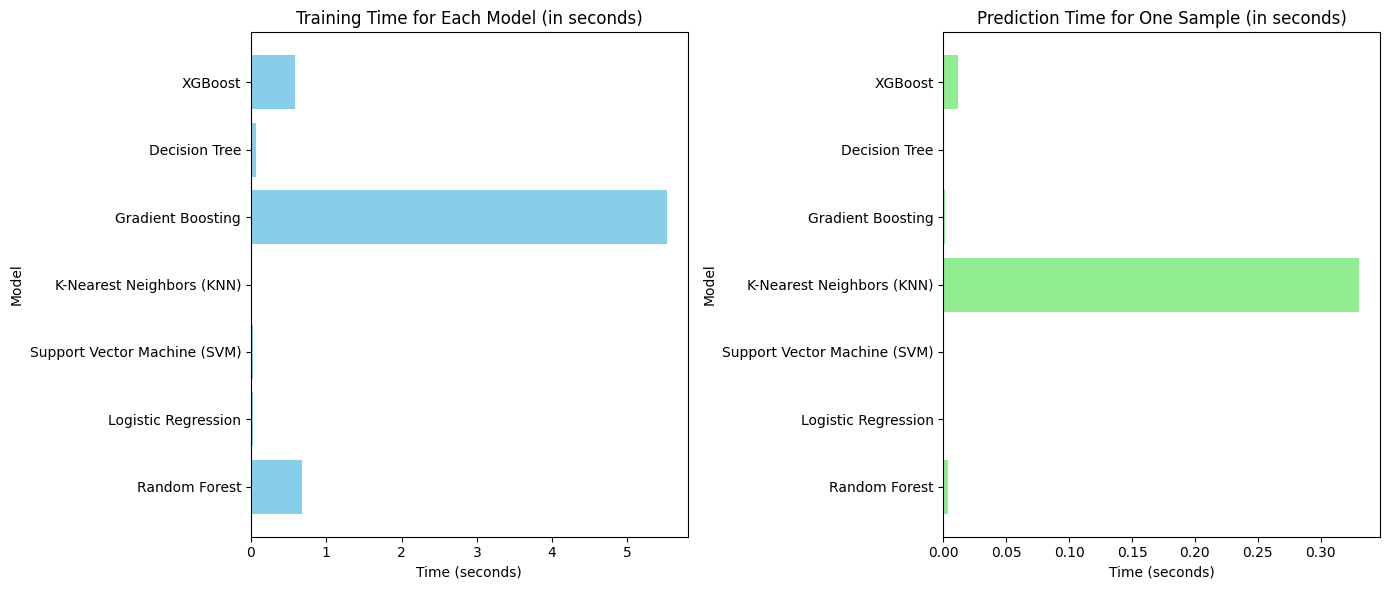

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Training Time plot
ax[0].barh(model_names, train_times, color='skyblue')
ax[0].set_title('Training Time for Each Model (in seconds)')
ax[0].set_xlabel('Time (seconds)')
ax[0].set_ylabel('Model')

# Prediction Time plot
ax[1].barh(model_names, predict_times, color='lightgreen')
ax[1].set_title('Prediction Time for One Sample (in seconds)')
ax[1].set_xlabel('Time (seconds)')
ax[1].set_ylabel('Model')

plt.tight_layout()
plt.show()

### 5 Seconds

In [8]:
features_file = "/home/arunb/Abhijeet_2021509/scam-legit/openSMILE/features/88_features_5s.csv"
data = pd.read_csv(features_file)
data.shape

(2811, 89)

In [9]:
data.head()

,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,slopeUV500-1500_sma3nz_amean,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp,label
0,34.846733,0.085622,32.679363,34.954594,37.613815,4.934452,150.103030,342.105740,20.068136,10.157452,...,0.008562,0.168890,4.008016,2.028398,0.325000,0.178564,0.148000,0.158417,-18.340912,0
1,35.493660,0.061029,34.037865,35.691498,36.978886,2.941021,28.014260,17.151926,19.878944,6.144651,...,0.009236,0.193678,3.807615,3.036437,0.190000,0.124793,0.111250,0.086232,-18.401716,0
2,34.998660,0.057508,33.464760,34.593002,36.747185,3.282425,44.941563,62.774746,18.461280,9.722256,...,0.009342,0.245109,3.807615,2.434077,0.314167,0.292360,0.076667,0.034960,-17.619335,0
3,35.336880,0.080527,33.293180,35.330322,37.355663,4.062485,32.360960,22.222784,13.220228,10.468033,...,0.009651,0.190489,4.609219,2.231237,0.301818,0.267134,0.126364,0.111378,-18.062067,0
4,34.573956,0.064008,32.845570,34.324310,35.861355,3.015785,14.805830,8.080097,16.687855,4.878918,...,0.006965,0.258327,4.008016,2.231237,0.331818,0.284471,0.096364,0.036995,-18.389640,0


In [10]:
data = shuffle(data, random_state=42)
X = data.drop(columns=["label"])
y = data["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Support Vector Machine (SVM)": SVC(random_state=42),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

In [12]:
train_times = []
predict_times = []
model_names = []

# Loop through each classifier, train, and evaluate
for name, model in classifiers.items():
    print(f"\nTraining and evaluating {name}...")

    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    train_times.append(train_time)
    model_names.append(name)
    print(f"Training Time: {train_time:.4f} seconds")

    # Measure prediction time for a single sample
    start_time = time.time()
    _ = model.predict([X_test[0]])  # Predict one sample
    predict_time = time.time() - start_time
    predict_times.append(predict_time)
    print(f"Prediction Time for one sample: {predict_time:.6f} seconds")

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    print("\nClassification Report:\n")
    print(classification_report(y_test, y_pred))


Training and evaluating Random Forest...
Training Time: 0.6181 seconds
Prediction Time for one sample: 0.003641 seconds
Accuracy: 1.0

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       277
           1       1.00      1.00      1.00       286

    accuracy                           1.00       563
   macro avg       1.00      1.00      1.00       563
weighted avg       1.00      1.00      1.00       563


Training and evaluating Logistic Regression...
Training Time: 0.0058 seconds
Prediction Time for one sample: 0.000149 seconds
Accuracy: 1.0

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       277
           1       1.00      1.00      1.00       286

    accuracy                           1.00       563
   macro avg       1.00      1.00      1.00       563
weighted avg       1.00      1.00      1.00       563


Training and evalua

/home/arunb/anaconda3/envs/project1/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:31:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training Time: 0.3084 seconds
Prediction Time for one sample: 0.002302 seconds
Accuracy: 1.0

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       277
           1       1.00      1.00      1.00       286

    accuracy                           1.00       563
   macro avg       1.00      1.00      1.00       563
weighted avg       1.00      1.00      1.00       563



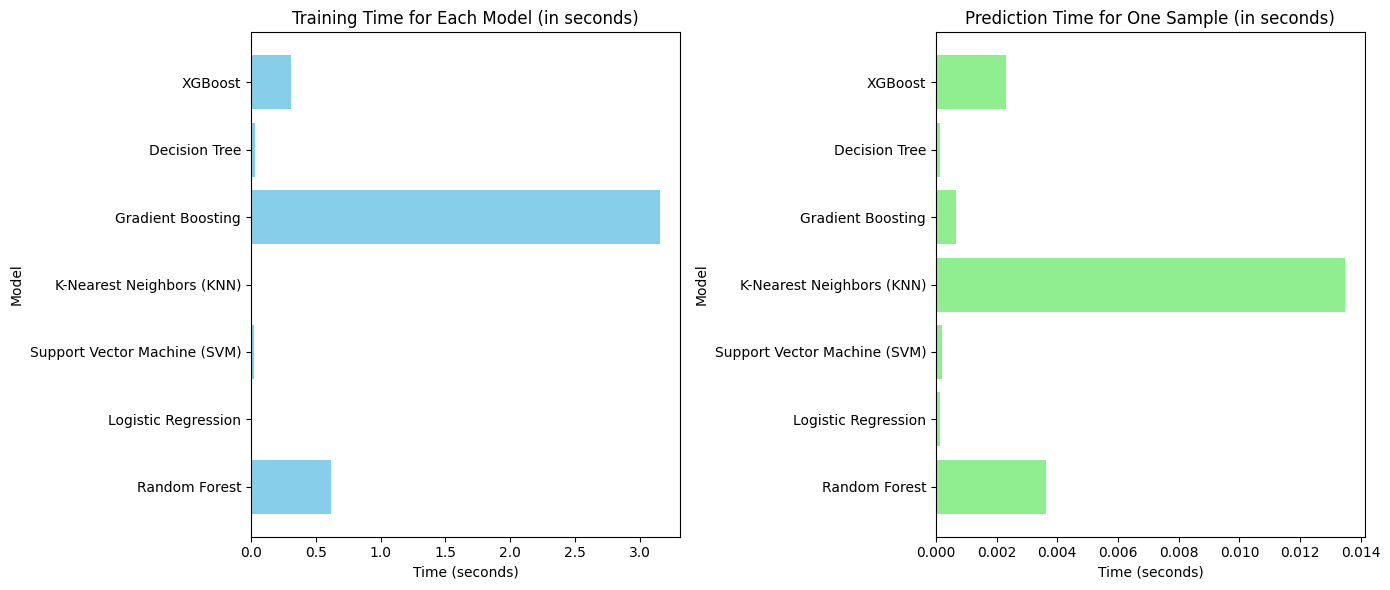

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Training Time plot
ax[0].barh(model_names, train_times, color='skyblue')
ax[0].set_title('Training Time for Each Model (in seconds)')
ax[0].set_xlabel('Time (seconds)')
ax[0].set_ylabel('Model')

# Prediction Time plot
ax[1].barh(model_names, predict_times, color='lightgreen')
ax[1].set_title('Prediction Time for One Sample (in seconds)')
ax[1].set_xlabel('Time (seconds)')
ax[1].set_ylabel('Model')

plt.tight_layout()
plt.show()

### 7.5 Seconds

In [3]:
features_file = "/home/arunb/Abhijeet_2021509/scam-legit/openSMILE/features/88_features_7.5s.csv"
data = pd.read_csv(features_file)
data.shape

(2811, 89)

In [4]:
data.head()

,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,slopeUV500-1500_sma3nz_amean,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp,label
0,34.570020,0.077884,32.490670,34.620968,36.746918,4.256248,111.155850,275.598400,19.928635,10.331953,...,0.008534,0.193198,4.138852,2.557201,0.251579,0.164165,0.119474,0.121849,-18.865387,0
1,35.032430,0.079156,32.191666,35.450720,37.115340,4.923675,42.642193,48.252420,17.036951,8.374681,...,0.009913,0.159625,3.471295,2.435724,0.223889,0.152794,0.157368,0.215988,-18.754217,0
2,34.480927,0.064769,32.834305,34.301704,36.208225,3.373920,27.517773,55.274284,17.730324,9.563338,...,0.009922,0.182238,3.471295,2.284946,0.276471,0.269574,0.132778,0.180641,-18.859499,0
3,34.531406,0.082957,32.512634,34.473780,36.431534,3.918900,23.094990,19.218758,18.430277,8.502799,...,0.008811,0.184765,4.405875,2.419355,0.270556,0.258338,0.115789,0.090048,-18.890697,0
4,34.644554,0.072519,32.747227,34.411797,36.293650,3.546425,19.275347,11.040649,14.393643,5.548837,...,0.008761,0.203220,3.738318,1.881720,0.358571,0.268723,0.142000,0.179154,-18.232260,0


In [5]:
data = shuffle(data, random_state=42)
X = data.drop(columns=["label"])
y = data["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Support Vector Machine (SVM)": SVC(random_state=42),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

In [7]:
train_times = []
predict_times = []
model_names = []

# Loop through each classifier, train, and evaluate
for name, model in classifiers.items():
    print(f"\nTraining and evaluating {name}...")

    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    train_times.append(train_time)
    model_names.append(name)
    print(f"Training Time: {train_time:.4f} seconds")

    # Measure prediction time for a single sample
    start_time = time.time()
    _ = model.predict([X_test[0]])  # Predict one sample
    predict_time = time.time() - start_time
    predict_times.append(predict_time)
    print(f"Prediction Time for one sample: {predict_time:.6f} seconds")

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    print("\nClassification Report:\n")
    print(classification_report(y_test, y_pred))


Training and evaluating Random Forest...
Training Time: 0.5753 seconds
Prediction Time for one sample: 0.003458 seconds
Accuracy: 1.0

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       277
           1       1.00      1.00      1.00       286

    accuracy                           1.00       563
   macro avg       1.00      1.00      1.00       563
weighted avg       1.00      1.00      1.00       563


Training and evaluating Logistic Regression...
Training Time: 0.0175 seconds
Prediction Time for one sample: 0.000233 seconds
Accuracy: 0.9982238010657194

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       277
           1       1.00      1.00      1.00       286

    accuracy                           1.00       563
   macro avg       1.00      1.00      1.00       563
weighted avg       1.00      1.00      1.00       563


Trai

/home/arunb/anaconda3/envs/project1/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:36:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training Time: 0.4747 seconds
Prediction Time for one sample: 0.002095 seconds
Accuracy: 1.0

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       277
           1       1.00      1.00      1.00       286

    accuracy                           1.00       563
   macro avg       1.00      1.00      1.00       563
weighted avg       1.00      1.00      1.00       563



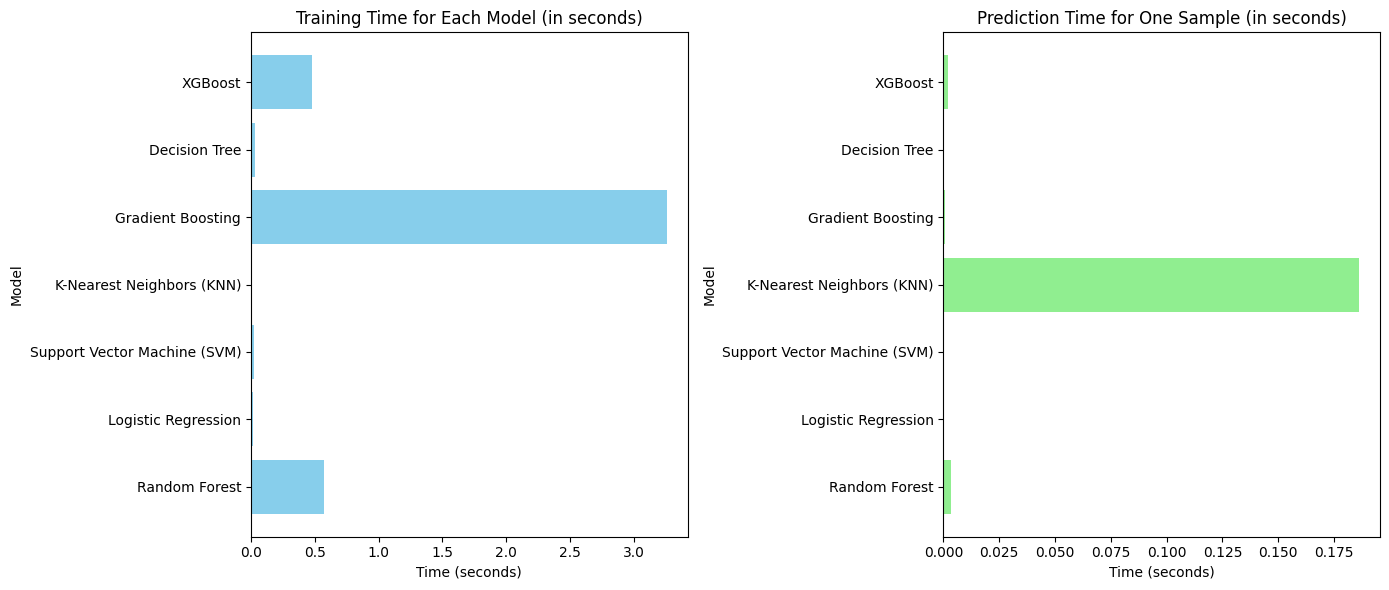

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Training Time plot
ax[0].barh(model_names, train_times, color='skyblue')
ax[0].set_title('Training Time for Each Model (in seconds)')
ax[0].set_xlabel('Time (seconds)')
ax[0].set_ylabel('Model')

# Prediction Time plot
ax[1].barh(model_names, predict_times, color='lightgreen')
ax[1].set_title('Prediction Time for One Sample (in seconds)')
ax[1].set_xlabel('Time (seconds)')
ax[1].set_ylabel('Model')

plt.tight_layout()
plt.show()

### 10 Seconds

In [2]:
features_file = "/home/arunb/Abhijeet_2021509/scam-legit/openSMILE/features/88_features_10s.csv"
data = pd.read_csv(features_file)
data.shape

(2811, 89)

In [3]:
data = shuffle(data, random_state=42)
X = data.drop(columns=["label"])
y = data["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Support Vector Machine (SVM)": SVC(random_state=42),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

In [5]:
train_times = []
predict_times = []
model_names = []

# Loop through each classifier, train, and evaluate
for name, model in classifiers.items():
    print(f"\nTraining and evaluating {name}...")

    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    train_times.append(train_time)
    model_names.append(name)
    print(f"Training Time: {train_time:.4f} seconds")

    # Measure prediction time for a single sample
    start_time = time.time()
    _ = model.predict([X_test[0]])  # Predict one sample
    predict_time = time.time() - start_time
    predict_times.append(predict_time)
    print(f"Prediction Time for one sample: {predict_time:.6f} seconds")

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    print("\nClassification Report:\n")
    print(classification_report(y_test, y_pred))


Training and evaluating Random Forest...
Training Time: 0.5746 seconds
Prediction Time for one sample: 0.003458 seconds
Accuracy: 1.0

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       277
           1       1.00      1.00      1.00       286

    accuracy                           1.00       563
   macro avg       1.00      1.00      1.00       563
weighted avg       1.00      1.00      1.00       563


Training and evaluating Logistic Regression...
Training Time: 0.0478 seconds
Prediction Time for one sample: 0.000144 seconds
Accuracy: 0.9982238010657194

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       277
           1       1.00      1.00      1.00       286

    accuracy                           1.00       563
   macro avg       1.00      1.00      1.00       563
weighted avg       1.00      1.00      1.00       563


Trai

/home/arunb/anaconda3/envs/project1/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:45:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training Time: 0.5191 seconds
Prediction Time for one sample: 0.002263 seconds
Accuracy: 1.0

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       277
           1       1.00      1.00      1.00       286

    accuracy                           1.00       563
   macro avg       1.00      1.00      1.00       563
weighted avg       1.00      1.00      1.00       563



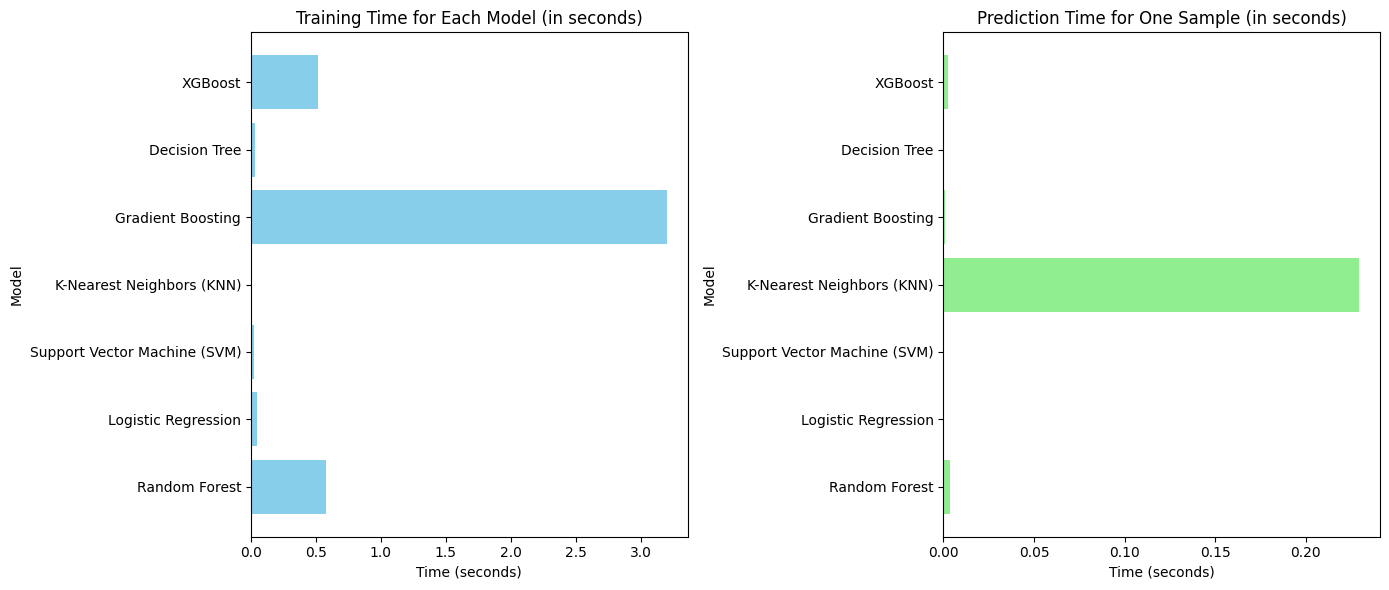

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Training Time plot
ax[0].barh(model_names, train_times, color='skyblue')
ax[0].set_title('Training Time for Each Model (in seconds)')
ax[0].set_xlabel('Time (seconds)')
ax[0].set_ylabel('Model')

# Prediction Time plot
ax[1].barh(model_names, predict_times, color='lightgreen')
ax[1].set_title('Prediction Time for One Sample (in seconds)')
ax[1].set_xlabel('Time (seconds)')
ax[1].set_ylabel('Model')

plt.tight_layout()
plt.show()